In [41]:
%pylab inline

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [42]:
import os
import sys
sys.path.append(os.environ.get('PYTHONPATH', None))

In [43]:
import util

In [44]:
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import make_classification
from sklearn import decomposition, preprocessing
from sklearn import cross_validation

## Read the Data

In [45]:
X_all, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=7, n_classes=2)

In [46]:
features = list()
for counter in range(0, 20):
    features.append("feature_%s" % counter)

## Feature Reduction

### transform

* __transform(X)__ returns the reduced matrix
* find for every column in the reduced matrix the matching column in the churn matrix and print the name of the feature

In [47]:
clf = LogisticRegression().fit(X_all, y)
X = clf.transform(X_all)

selected = util.selected_features(X_all, X, features)
selected

['feature_4', 'feature_6', 'feature_10', 'feature_11', 'feature_14']

### PCA

* This implementation uses the scipy.linalg implementation of the singular value decomposition.
* It only works for dense arrays and is not scalable to large dimensional data.

In [48]:
X = X_all

minmax_scaler = preprocessing.MinMaxScaler()
std_scaler = preprocessing.StandardScaler()

scaler = minmax_scaler
X_scaled = scaler.fit_transform(X)

pca = decomposition.PCA(n_components=3, whiten=False)
pca.fit(X_scaled)
X = pca.transform(X_scaled)

clf = LogisticRegression()
scores = cross_validation.cross_val_score(clf, X, y, cv=50)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.70 (+/- 0.19)


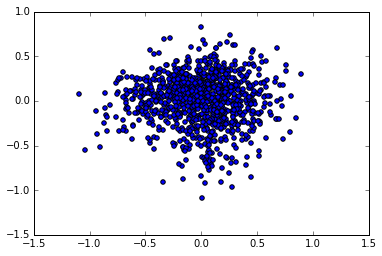

In [49]:
plt.scatter(X[:,0], X[:,1])